# Az intercepció hatása a növényzet számára hasznosítható csapadék mértékének alakulására

Az erdei fák számára felvehető csapadék mértékét jelentősen befolyásolja az a vízmennyiség, amit a lombfelület megköt és újra elpárologtat anélkül, hogy az elérhetné a talajfelszínt. Hazai környezetben fenyő esetén a talajfelszínen található vastag száraz tűavar ezt a hatás jelentősen fokozhatja. Az élő lomb és a száraz avar együttes hatásaként visszatartott csapadékmennyiség elérheti az 5-10 mm mértéket, ami sok esetben a teljes csapadékesemény 30-50%-át is jelentheti.

<img src="https://github.com/jsheperd/forest_water/blob/master/img/csapadek.png?raw=true" width="300" height="300" />

### Hipotézis

A növényzet számára felvehető csapadék alakulását nem csak az éves csapadékösszeg befolyásolja, de az eloszlási mintázat is meghatározó. A modellezhetőség szempontjából a legfontosabb tényezők a lombfelület aktuális nagysága, valamint az adott csapdékesemény mértéke mm-ben. A felszíni elfolyást és a mélybeszivárgást első vizsgálatainkban nem vesszük figyelembe, mert azok modellezéséhez további domborzati és talajtani paraméterek is szükségesek.

### Felhasznált adatok

Az [Országos meteorológia Szolgálat 1901-2010 éghajalati adasorai](http://www.met.hu/eghajlat/magyarorszag_eghajlata/eghajlati_adatsorok/) napi csapdékeseményeket is tartalmaznak, ami alkalmas arra, hogy becsléseket tegyünk az aktuális csapadékesemény intercepciós veszteségére 110 éves időszakra vonatkozóan.

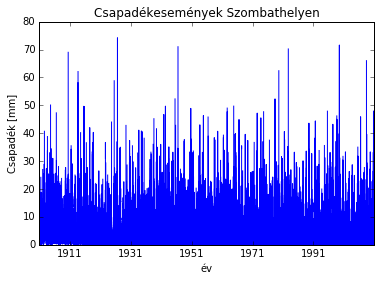

In [163]:
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame, Panel

dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
szo_daily = pd.read_csv('https://raw.githubusercontent.com/jsheperd/forest_water/master/data/SZO_d.txt', 
                        sep=';',
                        parse_dates=['#datum'], 
                        date_parser=lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
                        )

szo_daily.set_index(szo_daily['#datum'])
plt.plot('#datum', 'd_rs', data=szo_daily)
plt.ylabel(u'Csapadék [mm]')
plt.xlabel(u'év')
plt.title(u'Csapadékesemények Szombathelyen')

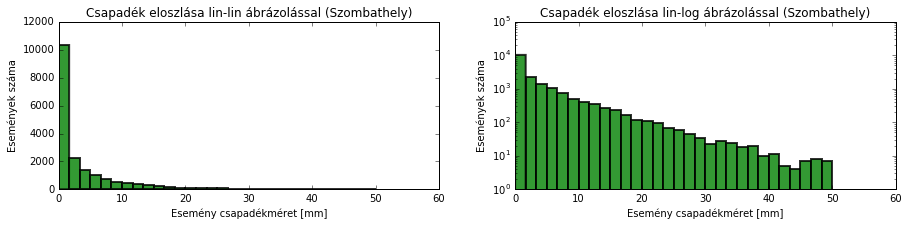

In [174]:
plt.subplots(figsize=(15,3))
plt.grid()
plt.subplot(121)
plt.hist(x=szo_daily['d_rs'], bins=30, range=[0, 50], color='green', alpha=0.8, lw=2)
plt.title(u'Csapadék eloszlása lin-lin ábrázolással (Szombathely)')
plt.ylabel(u'Események száma')
plt.xlabel(u'Esemény csapadékméret [mm]')
plt.subplot(122)
plt.yscale('log')
plt.hist(x=szo_daily['d_rs'], bins=30, range=[0, 50], color='green', alpha=0.8, lw=2)
plt.title(u'Csapadék eloszlása lin-log ábrázolással (Szombathely)')
plt.ylabel(u'Események száma')
plt.xlabel(u'Esemény csapadékméret [mm]')
